In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

insurance_df = pd.read_csv("../Data/insurance.csv")

In [63]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [64]:
insurance_df.iloc[1:3]

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


<Axes: xlabel='region'>

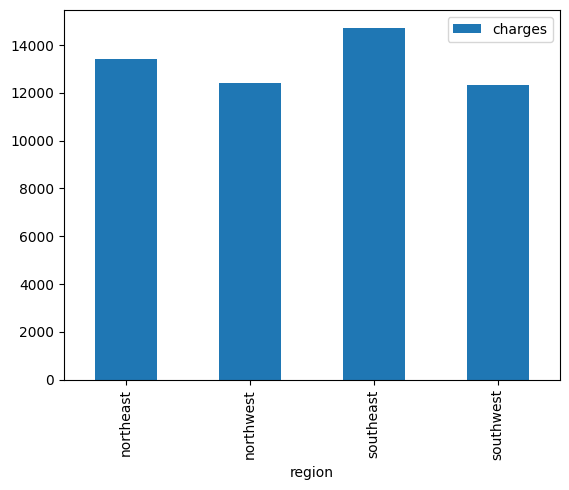

In [65]:
insurance_df.groupby("region").agg({"charges":"mean"}).plot.bar()

In [67]:
insurance_df = pd.get_dummies(insurance_df, drop_first=True).astype(int)
insurance_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


### Data Splitting

In [24]:
from sklearn.model_selection import train_test_split

insurance_df["smoker_flag"] = np.where(insurance_df["smoker"] == "yes", 1, 0)
# insurance_df["age_sq"] = insurance_df["age"] ** 2
# insurance_df["age_3"] = insurance_df["age"] ** 3

features = ["age", "bmi", "children", "smoker_flag"]

X = sm.add_constant(insurance_df[features])
y = insurance_df["charges"]

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=2023)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.25, random_state=2024)

In [25]:
model = sm.OLS(y_train, X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     585.3
Date:                Thu, 06 Nov 2025   Prob (F-statistic):          1.93e-235
Time:                        12:26:12   Log-Likelihood:                -8141.8
No. Observations:                 802   AIC:                         1.629e+04
Df Residuals:                     797   BIC:                         1.632e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.236e+04   1256.186     -9.840      0.000   -1.48e+04   -9895.361
age           259.9296     15.585     16.679      0.000     229.338     290.521
bmi           330.1479     36.265      9.104      0.000     258.961     401.334
children      541.3543    184.169      2.939      0.003     179.841     902.867
smoker_flag  2.392e+04    547.869     43.667      0.000    2.28e+04     2.5e+04
==============================================================================
Omnibus:                      176.557   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.669
Skew:                           1.204   Prob(JB):                     4.87e-84
Kurtosis:                       5.384   Cond. No.                         294.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae

print(f"Train R2: {r2(y_train, model.predict(X_train))}")
print(f"Train MAE: {mae(y_train, model.predict(X_train))}")
print(f"Validation R2: {r2(y_valid, model.predict(X_valid))}")
print(f"Validation MAE: {mae(y_valid, model.predict(X_valid))}")


Train R2: 0.7460214272397101
Train MAE: 4290.287560582364
Validation R2: 0.750904079685457
Validation MAE: 4194.9616762883425


### Validation Scoring

In [27]:
model = sm.OLS(y_train, X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     585.3
Date:                Thu, 06 Nov 2025   Prob (F-statistic):          1.93e-235
Time:                        12:26:13   Log-Likelihood:                -8141.8
No. Observations:                 802   AIC:                         1.629e+04
Df Residuals:                     797   BIC:                         1.632e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.236e+04   1256.186     -9.840      0.000   -1.48e+04   -9895.361
age           259.9296     15.585     16.679      0.000     229.338     290.521
bmi           330.1479     36.265      9.104      0.000     258.961     401.334
children      541.3543    184.169      2.939      0.003     179.841     902.867
smoker_flag  2.392e+04    547.869     43.667      0.000    2.28e+04     2.5e+04
==============================================================================
Omnibus:                      176.557   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.669
Skew:                           1.204   Prob(JB):                     4.87e-84
Kurtosis:                       5.384   Cond. No.                         294.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae

print(f"Train R2: {r2(y_train, model.predict(X_train))}")
print(f"Train MAE: {mae(y_train, model.predict(X_train))}")
print(f"Validation R2: {r2(y_valid, model.predict(X_valid))}")
print(f"Validation MAE: {mae(y_valid, model.predict(X_valid))}")


Train R2: 0.7460214272397101
Train MAE: 4290.287560582364
Validation R2: 0.750904079685457
Validation MAE: 4194.9616762883425


### Final Fit (on all training data) & Test Score

In [29]:
model = sm.OLS(y, X).fit()

print(f"Train R2: {r2(y, model.predict(X))}")
print(f"Train MAE: {mae(y, model.predict(X))}")

Train R2: 0.7475937041957614
Train MAE: 4198.787893587897


In [30]:
print(f"Test R2: {r2(y_test, model.predict(X_test))}")
print(f"Test MAE: {mae(y_test, model.predict(X_test))}")

Test R2: 0.7589480825048381
Test MAE: 4042.196079549451


### Cross Validation Loop

In [31]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score as r2


kf = KFold(n_splits=5, shuffle=True, random_state=2023)

# Create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Loop through each fold in X and y
for train_ind, val_ind in kf.split(X, y):
    # Subset data based on CV folds
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    # Fit the Model on fold's training data
    model = sm.OLS(y_train, X_train).fit()
    # Append Validation score to list 
    cv_lm_r2s.append(r2(y_val, model.predict(X_val),))
    cv_lm_mae.append(mae(y_val, model.predict(X_val),))

print("All Validation R2s: ", [round(x, 3) for x in cv_lm_r2s])
print(f"Cross Val R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")

print("All Validation MAEs: ", [round(x, 3) for x in cv_lm_mae])
print(f"Cross Val MAEs: {round(np.mean(cv_lm_mae), 3)} +- {round(np.std(cv_lm_mae), 3)}")

All Validation R2s:  [0.736, 0.752, 0.756, 0.77, 0.714]
Cross Val R2s: 0.745 +- 0.019
All Validation MAEs:  [4363.249, 3995.482, 4385.796, 3958.32, 4418.007]
Cross Val MAEs: 4224.171 +- 202.984


### Final Fit & Score On Test

In [32]:
model = sm.OLS(y, X).fit()

r2(y_test, model.predict(X_test))

0.7589480825048381

In [ ]:
!git add 05_Validating_Testing_Demos.ipynb
!git commit 
!